Metro Network Analysis involves examining the network of metro systems to understand their structure, efficiency, and effectiveness. It typically includes analyzing routes, stations, traffic, connectivity, and other operational aspects. So, if you want to learn how to analyze the metro network in a city

#Delhi Metro Network Analysis: Process We Can Follow

##Analyzing the metro network in a city like Delhi helps improve urban transportation infrastructure, leading to better city planning and enhanced commuter experiences. Below is the process we can follow for the task of Metro Network Analysis of Delhi:

##Determine what you want to achieve. It could be optimizing routes, reducing congestion, improving passenger flow, or understanding travel patterns.
##Collect data on metro lines, stations, connections, and transit schedules.
##Clean the data for inconsistencies, missing values, or errors.
##Create visual representations of the network, such as route maps, passenger flow charts, or heat maps of station congestion.
##Analyze how effectively the network handles passenger traffic and meets operational targets.
##So, for the task of Delhi Metro Network Analysis, we need to have a dataset based on all metro lines in Delhi and how they connect with each other.

#Importing Dependies

In [56]:
import pandas as pd
from google.colab import files
import seaborn as sns
import folium
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.templates.default = "plotly_white"

In [58]:
uploaded=files.upload()

Saving Delhi-Metro-Network.csv to Delhi-Metro-Network (2).csv


In [59]:
df=pd.read_csv("Delhi-Metro-Network.csv")

In [60]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


#Looking for any Missing Values or duplicated data

In [61]:
df.isna().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Station ID                285 non-null    int64  
 1   Station Name              285 non-null    object 
 2   Distance from Start (km)  285 non-null    float64
 3   Line                      285 non-null    object 
 4   Opening Date              285 non-null    object 
 5   Station Layout            285 non-null    object 
 6   Latitude                  285 non-null    float64
 7   Longitude                 285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [63]:
df.duplicated().sum()

0

#Converting Opening Date Column in date time format

In [64]:
df['Opening Date']=pd.to_datetime(df['Opening Date'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.9+ KB


#Geospatial Analysis
###Now, I’ll start by visualizing the locations of the metro stations on a map. It will give us an insight into the geographical distribution of the stations across Delhi. We will use the latitude and longitude data to plot each station.
For this, I’ll create a map with markers for each metro station. Each marker will represent a station, and we’ll be able to analyze aspects like station density and geographic spread. Let’s proceed with this visualization:

In [66]:
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260


In [67]:
df['Line'].value_counts()

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: Line, dtype: int64

In [68]:
line_color={'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
     }

In [69]:
delhi_metro_map_with_line_tooltip=folium.Map(location=[28.7041, 77.1025], zoom_start=12)

In [70]:
delhi_metro_map_with_line_tooltip

In [71]:
#Adding colored marker for each metro station with line name with tooltip
# adding colored markers for each metro station with line name in tooltip
for index, row in df.iterrows():
    line = row['Line']
    color = line_color.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station Name']}",
        tooltip=f"{row['Station Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_metro_map_with_line_tooltip)





In [72]:
delhi_metro_map_with_line_tooltip

Here is the map showing the geographical distribution of Delhi Metro stations. Each marker represents a metro station, and you can hover over or click on the markers to see the station name and the metro line it belongs to. This map provides a visual understanding of how the metro stations are spread across Delhi.

#Temporal Analysis
##Now, I will analyze the growth of the Delhi Metro network over time. I’ll look at how many stations were opened each year and visualize this growth. It can provide insights into the pace of metro network expansion and its development phases.

###I’ll start by extracting the year from the Opening Date and then count the number of stations opened each year. Following this, I’ll visualize this information in a bar plot. Let’s proceed with this analysis:

In [73]:
df['Opening Date']=df['Opening Date'].dt.year

In [74]:
station_per_year=df['Opening Date'].value_counts().sort_index()

In [75]:
station_per_year_df=station_per_year.reset_index()

In [76]:
station_per_year_df.columns=['Year','No of Stations']

In [77]:
station_per_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Year            15 non-null     int64
 1   No of Stations  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


In [78]:
station_per_year_df['Year']=pd.to_datetime(station_per_year_df['Year'])

<ipython-input-79-43790d3bfe30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_per_year_df, x='Year', y='No of Stations', palette=colors)
<ipython-input-79-43790d3bfe30>:4: UserWarning: 
The palette list has fewer values (10) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=station_per_year_df, x='Year', y='No of Stations', palette=colors)


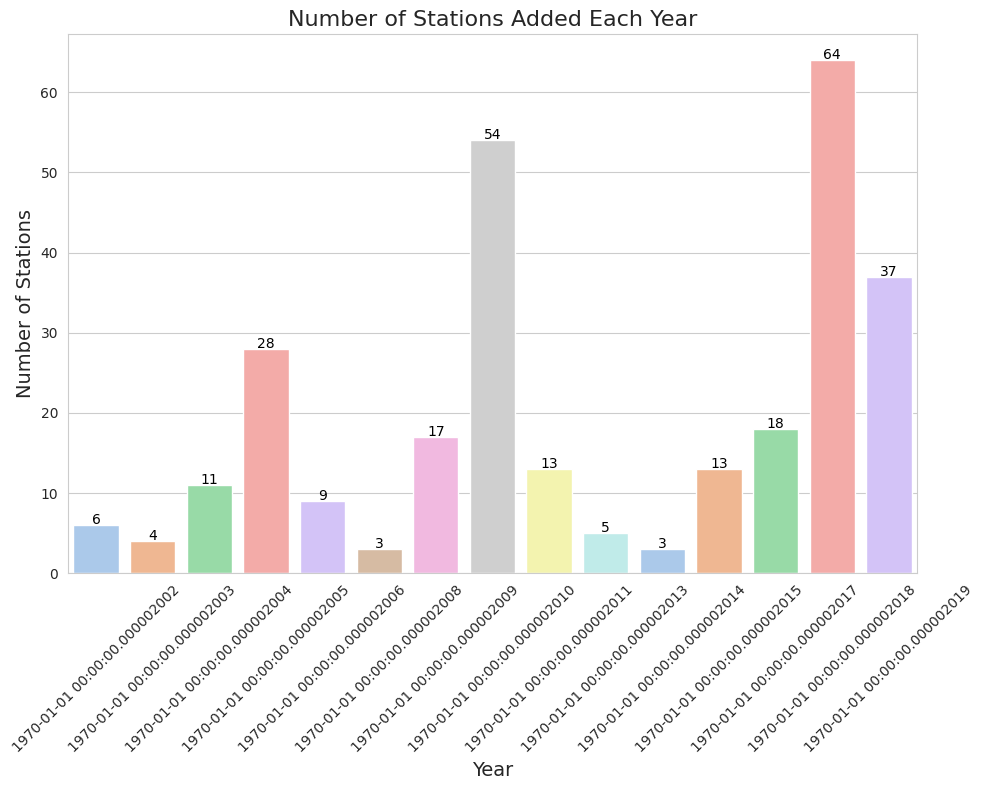

In [79]:
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")
plt.figure(figsize=(10, 8))
sns.barplot(data=station_per_year_df, x='Year', y='No of Stations', palette=colors)
plt.title('Number of Stations Added Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Stations', fontsize=14)
for index, row in station_per_year_df.iterrows():
    plt.text(index, row['No of Stations'] + 0.1, row['No of Stations'], color='black', ha="center")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart illustrates the number of Delhi Metro stations opened each year. This visualization helps us understand the temporal development of the metro network. Some key observations include:

Some years show a significant number of new station openings, indicating phases of rapid network expansion.
Conversely, there are years with few or no new stations, which could be due to various factors like planning, funding, or construction challenges.

#Line Analysis
##Now, I’ll analyze the various metro lines in terms of the number of stations they have and the average distance between stations. It will give us insights into the characteristics of each metro line, such as which lines are more extensive or denser.

##I’ll calculate the number of stations per line and the average distance between stations on each line. I’ll then visualize these metrics to better understand the differences between the lines. Let’s start with these calculations:

In [80]:
#To calculate how many stations on each line
df.head()

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005,Elevated,28.619320,77.033260


In [83]:
no_of_stations_per_line=df['Line'].value_counts()

In [84]:
no_of_stations_per_line

Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: Line, dtype: int64

<ipython-input-94-e6ee0c6cd15e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_distance_per_line_sorted, x='Distance from Start (km)', y='Line', palette='viridis')


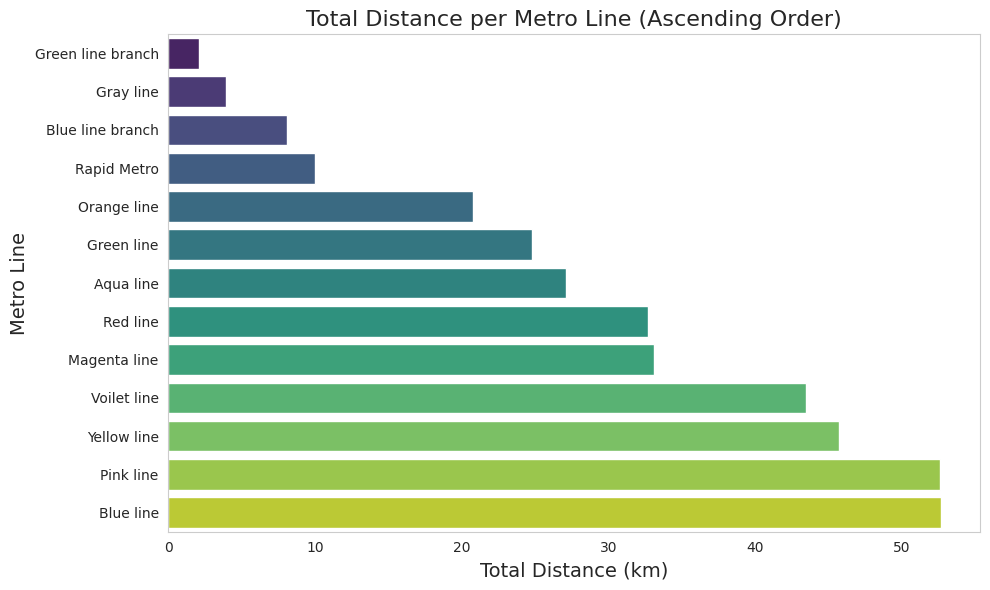

In [94]:

total_distance_per_line = df.groupby('Line')['Distance from Start (km)'].max().reset_index()
total_distance_per_line_sorted = total_distance_per_line.sort_values(by='Distance from Start (km)', ascending=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=total_distance_per_line_sorted, x='Distance from Start (km)', y='Line', palette='viridis')
plt.title('Total Distance per Metro Line (Ascending Order)', fontsize=16)
plt.xlabel('Total Distance (km)', fontsize=14)
plt.ylabel('Metro Line', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [92]:
average_distance_of_stations=total_distance_per_line/(no_of_stations_per_line-1)

In [95]:
average_distance_of_stations.sort_values()

Rapid Metro          1.000000
Green line branch    1.050000
Blue line            1.097917
Blue line branch     1.157143
Red line             1.167857
Green line           1.240000
Yellow line          1.269444
Voilet line          1.318182
Aqua line            1.355000
Magenta line         1.379167
Pink line            1.421622
Gray line            1.950000
Orange line          4.160000
dtype: float64

#Station Layout Analysis
##Next, I’ll explore the station layouts (Elevated, Ground Level, Underground). I’ll analyze the distribution of these layouts across the network and see if there are any patterns or trends, such as certain lines favouring a particular layout.

##I’ll calculate the frequency of each layout type and then visualize these frequencies to get a clearer picture of the layout distribution. Let’s proceed with this:

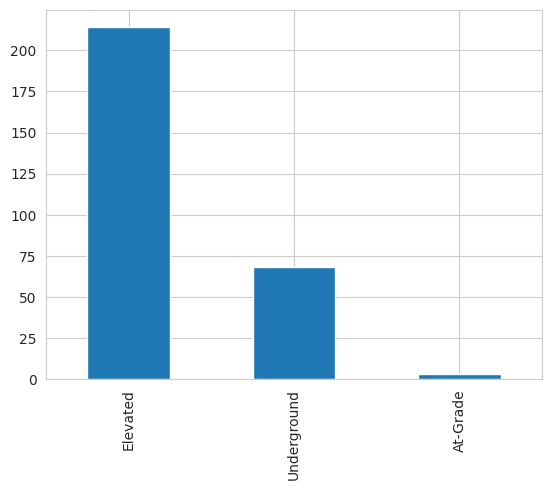

In [98]:
station_layout_count=df['Station Layout'].value_counts().plot(kind='bar')

In [97]:
station_layout_count

Elevated       214
Underground     68
At-Grade         3
Name: Station Layout, dtype: int64